#Name: Akash Badhautiya (24AI60R43)

## **Machine Learning (Labs) Mid-Semester Examination (28-08-2024)**

### Full Marks: 20

### **Objective:**

You are to download the ***Student Performance*** dataset from [https://archive.ics.uci.edu/dataset/320/student+performance](https://archive.ics.uci.edu/dataset/320/student+performance) for this examination. This dataset contains 649 samples, with 30 features each. Note that the final three columns represent the following:

*   G1: 1st period grades
*   G2: 2nd period grades
*   G3: 3rd period (final year) grades

and both G1 and G2 are NOT to be considered as features.

Your task is to predict the final year (G3) grades of students from a test-set extracted from the given dataset, using ***Linear Regression***. In our laboratory session on Linear Regression, we had dealt with continuous features. The given dataset, however, has *binary*, *integer* and *continuous* features, which need to be handled appropriately.  

After performing the necessary checks for duplicate and missing values for any sample, you need to perform ***one-hot encoding*** for the categorical features. If a certain categorial feature can take *k* distinct values, you should represent it using (*k-1*) binary features. Also, display the number of features in the encoded feature set thus obtained.

Scale the features so that all their values remain in the same range, and split the entire dataset into ***70% (train) - 15% (validation) - 15% (test)***. Implement linear regression *from scratch* on the dataset, with ***gradient descent*** and the ***mean-squared error (MSE)*** loss function.

You are also required to implement ***learning rate scheduling*** as follows: Start with a high learning rate (***0.1***) and ***reduce it by a factor of 0.1*** whenever the loss on the validation set does not reduce for ***10 consecutive steps***. Stop training when the learning rate reaches a threshold (***10^-5***) and the loss does not reduce further.

Plot the progression of both training and validation losses, and report the MSE loss on the test-set. Finally, show a scatter plot of the predicted final grades against the true grades.





**Step 1: Load the Dataset**

Install the ucimlrepo package and then load the Student Performance dataset as a pandas dataframe.

In [39]:
pip install ucimlrepo

In [46]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

# metadata
print(student_performance.metadata)

# variable information
print(student_performance.variables)


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'published_in': 'Proceedings of 5th Annual Future Business Technology Conference', 'year'

**Step 2: Check for Duplicates and Missing Values (2 marks)**

Check for any duplicate entries and missing values.

In [47]:
#checking the duplicate
X.duplicated().sum()

0

In [48]:
# Checking  for the null values
X.isnull().sum()

# Filling the  missing values with the mode of each column
X.fillna(X.mode().iloc[0])

# Checking again  for the  missing values again
X.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
dtype: int64

**Step 3: One-Hot Encoding for Categorical Features (2 marks)**

Identify categorical features and perform one-hot encoding. (Drop features "G1" and "G2")

In [49]:
#Droping the  features {"G1" and "G2"}
y = y.drop(columns=['G1', 'G2'])

#Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns
non_categorical_feature=X.select_dtypes(include=['int','float']).columns


In [50]:
print(categorical_features)
print(non_categorical_feature)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')
Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'],
      dtype='object')


In [52]:
import pandas as pd
#implementing the one hot encoding for categorical data
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

#Printing  the number of features in the encoded featurs
print("Number of features after encoding:", X_encoded.shape[1])


Number of features after encoding: 39


**Step 4: Feature Scaling (2 marks)**

Normalize the features to ensure all are within the same range, between 0 and 1.

In [54]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler=MinMaxScaler()

X_scaled=pd.DataFrame(scaler.fit_transform(X_encoded),columns=X_encoded.columns)
print(X_scaled)



          age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0    0.428571  1.00  1.00    0.333333   0.333333  0.000000    0.75      0.50   
1    0.285714  0.25  0.25    0.000000   0.333333  0.000000    1.00      0.50   
2    0.000000  0.25  0.25    0.000000   0.333333  0.000000    0.75      0.50   
3    0.000000  1.00  0.50    0.000000   0.666667  0.000000    0.50      0.25   
4    0.142857  0.75  0.75    0.000000   0.333333  0.000000    0.75      0.50   
..        ...   ...   ...         ...        ...       ...     ...       ...   
644  0.571429  0.50  0.75    0.000000   0.666667  0.333333    1.00      0.75   
645  0.428571  0.75  0.25    0.000000   0.333333  0.000000    0.75      0.50   
646  0.428571  0.25  0.25    0.333333   0.333333  0.000000    0.00      0.00   
647  0.285714  0.75  0.25    0.333333   0.000000  0.000000    0.25      0.75   
648  0.428571  0.75  0.50    0.666667   0.000000  0.000000    0.75      0.75   

     goout  Dalc  ...  guardian_mother 

In [58]:
#merging the non categorical data with encoded categorical data
import pandas as pd
# Concatenate the scaled categorical features with the non-categorical features
X = pd.concat([X_scaled[X_encoded.columns], X[non_categorical_feature]], axis=1)


In [59]:
# Reset the indices of X to match y
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)


**Step 5: Split Data into Training, Validation, and Test Sets (1 mark)**

Split the data into 70% training, 15% validation, and 15% test sets.

In [34]:
from sklearn.model_selection import train_test_split
#spliting the data into train , test , validation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=46)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=46)

#printing the shape of X_train, X_validation ,X_test
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)



Training set shape: (454, 39)
Validation set shape: (97, 39)
Test set shape: (98, 39)


**Step 6: Implement Linear Regression from Scratch (8 marks)**

Implement linear regression using gradient descent and mean squared error (MSE) as the loss function.

In [66]:
import numpy as np

In [68]:
def Linear_Regression(X_train, y_train, X_val, y_val, learning_rate, epochs=1000):
  no_samp,no_features=X_train.shape
  weight=np.zeros(no_features)
  bias=0
  train_loss_history=[]
  val_loss_history=[]


  #initializing the learning rate parameter
  L_rate=learning_rate
  L_deca_fact=0.1
  L_deca_counter=0
  L_thresold=1e-5


  for i in range(epochs):

    #updating the y_pred
    y_pred=np.dot(X_train , weight)+bias

    #calculating_the_loss
    loss=(1/(2*no_samp))*np.sum((y_pred-y_train)**2)
    train_loss_history.append(loss)

    #calculating_the_gradient
    dw=(1/no_samp)*np.dot(X_train.T,(y_pred-y_train))
    db=(1/no_samp)*np.sum(y_pred-y_train)

    #updating_the_weight-and_bias
    weight=weight-L_rate*dw
    bias=bias-L_rate*db

    #predict_on_validation_set
    y_pred_val=np.dot(X_val,weight)+bias
    val_loss=(1/(2*X_val.shape[0]))*np.sum((y_pred_val-y_val)**2)
    val_loss_history.append(val_loss)

    #codition_applying_and_scheduling_the_learning_rate
    if i>0 and val_loss_history[-1]>=val_loss_history[-2]:
      L_deca_counter +=1
      if L_deca_counter>=10:
        L_rate=L_rate*L_deca_fact
        L_deca_counter=0
      else :
        L_deca_counter=0

      if L_rate<L_thresold:
        break

  return weight , bias, train_loss_history,val_loss_history

**Step 7: Plot the Training and Validation Losses (1 mark)**

Plot the variation of training and validation losses with training progress.

In [70]:
import matplotlib.pyplot as plt

#Training_the_model
learning_rate=0.1

weight, bias, train_loss_dict, val_loss_dict = Linear_Regression(X_train, y_train.values.flatten(), X_val, y_val.values.flatten(),learning_rate)



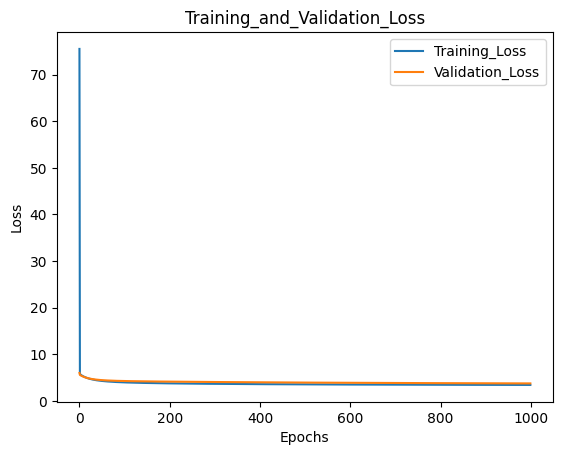

In [71]:

#ploting_the_training_and_validation_loss
plt.plot(train_loss_dict, label='Training_Loss')
plt.plot(val_loss_dict, label='Validation_Loss')
plt.title('Training_and_Validation_Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

**Step 8: Evaluate Model on Test Set (2 marks)**

In [72]:
import numpy as np
import matplotlib.pyplot as plt

#y_predicted
y_pred_t = np.dot(X_test, weight) + bias

#calculating_the_mean_square_error
mean_squared_error = np.mean((y_pred_t - y_test.values.flatten()) ** 2)
print("MSE on test set:", mean_squared_error)

MSE on test set: 6.8786240429347245


**Step 9: Scatter Plot of Predicted vs. True Grades (2 marks)**

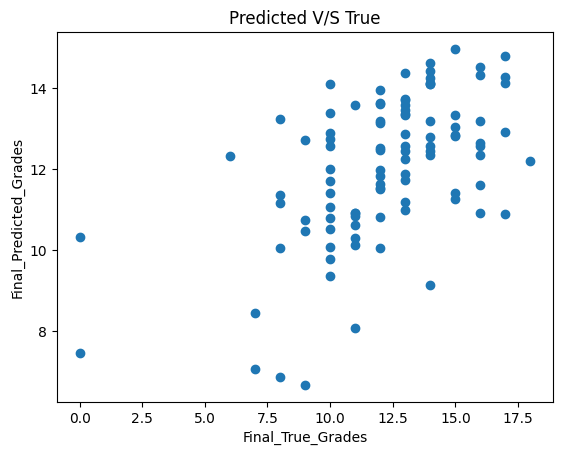

In [76]:
#predicted v/s true value
plt.scatter(y_test, y_pred_t)
plt.title('Predicted V/S True')
plt.ylabel('Final_Predicted_Grades')
plt.xlabel('Final_True_Grades')
plt.show()